##0. Conectando el Drive de Google

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
!ls

Mounted at /content/drive/
drive  sample_data


##1. Vinculando la carpeta de México
Fuente de los archivos CSV https://www.inegi.org.mx/programas/enoe/15ymas/?ps=microdatos

In [3]:
%cd'/content/drive/Shareddrives/BID/Ciudades/BID/Ciudades/MicroDatos/Mexico'
!ls

[Errno 2] No such file or directory: '/content/drive/Shareddrives/BID/Ciudades/BID/Ciudades/MicroDatos/Mexico'
/content
drive  sample_data


In [4]:
import pandas as pd
pd.__version__

'1.1.5'

##2. Cargando archivos CSV por trimestres Junio desde 2017 y alistamiento de datos para merge completo
Base Coe1 para ocupados, región y sector, mientras que
Base coe2 para salarios

El documento de “Reconstrucción de variables” de la ENOE, hace uso del nombre de los
campos que están almacenados en las tablas. Como por ejemplo: los campos con el nombre “P1”, “P1A1”, “P1A2”, etc. Pertenecen a la
tabla de cuestionario de ocupación y empleo (COE1T), los campos “P6_1”, “P6_2”, “´P6_3”, etc. Son de la tabla COE2T. 

La base de datos de la ENOE contiene el factor de expansión en sus cinco tablas, dicho factor se encuentra en el
campo "FAC", el cual almacena un valor numérico de 6 dígitos y este indica a cuantas personas (población)
representa de la población total. 

###Trimestre 2 de 2017

In [6]:
path = '/content/drive/Shareddrives/BID/Ciudades/MicroDatos/Mexico/coe1t217.CSV'
df2t17a = pd.read_csv(path)
df2t17a

,r_def,cd_a,ent,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,p1,p1a1,p1a2,p1a3,p1b,p1c,p1d,p1e,p2_1,p2_2,p2_3,p2_4,p2_9,p2a_dia,p2a_sem,p2a_mes,p2a_anio,p2b_dia,p2b_sem,p2b_mes,p2b_anio,p2b,p2c,p2d1,p2d2,...,p5b_mdo,p5b_thrs,p5b_tdia,p5c,p5d1,p5d_hlu,p5d_mlu,p5d_hma,p5d_mma,p5d_hmi,p5d_mmi,p5d_hju,p5d_mju,p5d_hvi,p5d_mvi,p5d_hsa,p5d_msa,p5d_hdo,p5d_mdo,p5d_thrs,p5d_tdia,p5e,p5f1,p5f2,p5f3,p5f4,p5f5,p5f6,p5f7,p5f8,p5f9,p5f10,p5f11,p5f12,p5f13,p5f14,p5f15,p5f99,ur,fac
0,0,1,9,40001,900471,101,55,2,1,0,4,217,1,63,2,1,,,,,NaN,,,,,,,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,0.0,48.0,6,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,648
1,0,1,9,40001,900471,101,55,2,1,0,4,217,2,59,2,2,,,3,2,NaN,,,,,,4,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,648
2,0,1,9,40001,900471,101,55,2,1,0,4,217,3,31,2,1,,,,,NaN,,,,,,,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,0.0,45.0,5,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,648
3,0,1,9,40001,900471,101,80,3,1,0,4,217,1,52,3,2,,,3,2,NaN,,,,2,,,,1.0,,12.0,2016.0,30.0,,3.0,2017.0,1,1,1.0,NaN,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,648
4,0,1,9,40001,900471,101,80,3,1,0,4,217,2,51,3,1,,,,,NaN,,,,,,,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,0.0,35.0,5,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312028,0,86,32,60039,3260283,503,206,17,1,0,5,217,2,17,2,2,,,3,2,NaN,,,,,,4,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,239
312029,0,86,32,60039,3260283,503,219,18,1,0,5,217,1,34,2,1,,,,,NaN,,,,,,,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,0.0,60.0,6,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,2,239
312030,0,86,32,60039,3260283,503,219,18,1,0,5,217,2,32,2,2,,,3,2,NaN,,,,,,4,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,239
312031,0,86,32,60039,3260283,503,242,20,1,2,5,217,1,66,1,2,,,3,2,NaN,,,,,,4,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,239


In [7]:
path =  '/content/drive/Shareddrives/BID/Ciudades/MicroDatos/Mexico/coe2t217.CSV'
df2t17b = pd.read_csv(path)
df2t17b

,cd_a,ent,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,p6_1,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8,p6_9,p6_10,p6_99,p6a1,p6a2,p6a3,p6a4,p6a9,p6b1,p6b2,p6c,p6d,p7,p7a,p7b,p7c,p8_1,p8_2,p8_3,p8_4,p8_9,p8a,p9_1,p9_h1,p9_m1,p9_2,p9_h2,p9_m2,p9_3,p9_h3,p9_m3,p9_4,p9_h4,p9_m4,p9_5,p9_h5,p9_m5,p9_6,p9_h6,p9_m6,p9_7,p9_h7,p9_m7,p9_8,p9_h8,p9_m8,ur,fac
0,1,9,40001,900471,101,55,2,1,0,4,217,1,63,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,4,,4,5160.0,,6,7,NaN,,NaN,,,,4,,,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,1,648
1,1,9,40001,900471,101,55,2,1,0,4,217,2,59,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,NaN,,,,NaN,,NaN,,,,,,,,NaN,NaN,,NaN,NaN,3,3.0,0.0,,NaN,NaN,,NaN,NaN,,NaN,NaN,7,18.0,0.0,,NaN,NaN,1,648
2,1,9,40001,900471,101,55,2,1,0,4,217,3,31,2,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,,,,,,8,NaN,8,1,7,NaN,,NaN,,,,4,,,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,7,1.0,0.0,,NaN,NaN,1,648
3,1,9,40001,900471,101,80,3,1,0,4,217,1,52,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,NaN,,,,NaN,,NaN,,,,,,,,NaN,NaN,,NaN,NaN,3,2.0,0.0,,NaN,NaN,,NaN,NaN,,NaN,NaN,7,7.0,0.0,,NaN,NaN,1,648
4,1,9,40001,900471,101,80,3,1,0,4,217,2,51,3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,4,,8,NaN,8,6,7,NaN,,NaN,,,,4,,,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,7,7.0,0.0,,NaN,NaN,1,648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312028,86,32,60039,3260283,503,206,17,1,0,5,217,2,17,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,NaN,,,,NaN,,NaN,,,,,,,,NaN,NaN,2,14.0,0.0,,NaN,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN,7,21.0,0.0,,NaN,NaN,2,239
312029,86,32,60039,3260283,503,219,18,1,0,5,217,1,34,2,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,,,,,,4,4386.0,,6,7,NaN,,NaN,,,,4,,,,NaN,NaN,2,5.0,0.0,3,2.0,0.0,,NaN,NaN,,NaN,NaN,,NaN,NaN,7,3.0,0.0,,NaN,NaN,2,239
312030,86,32,60039,3260283,503,219,18,1,0,5,217,2,32,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,NaN,,,,NaN,,NaN,,,,,,,,NaN,NaN,2,24.0,0.0,3,10.0,0.0,4,5.0,0.0,,NaN,NaN,,NaN,NaN,7,35.0,0.0,,NaN,NaN,2,239
312031,86,32,60039,3260283,503,242,20,1,2,5,217,1,66,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,NaN,,,,NaN,,NaN,,,,,,,,NaN,NaN,,NaN,NaN,3,7.0,0.0,,NaN,NaN,,NaN,NaN,,NaN,NaN,7,14.0,0.0,,NaN,NaN,2,239


In [ ]:
df2t17b.info

<bound method DataFrame.info of         cd_a  ent    con      upm  d_sem  ...  p9_8  p9_h8  p9_m8  ur  fac
0          1    9  40001   900471    101  ...          NaN    NaN   1  648
1          1    9  40001   900471    101  ...          NaN    NaN   1  648
2          1    9  40001   900471    101  ...          NaN    NaN   1  648
3          1    9  40001   900471    101  ...          NaN    NaN   1  648
4          1    9  40001   900471    101  ...          NaN    NaN   1  648
...      ...  ...    ...      ...    ...  ...   ...    ...    ...  ..  ...
312028    86   32  60039  3260283    503  ...          NaN    NaN   2  239
312029    86   32  60039  3260283    503  ...          NaN    NaN   2  239
312030    86   32  60039  3260283    503  ...          NaN    NaN   2  239
312031    86   32  60039  3260283    503  ...          NaN    NaN   2  239
312032    86   32  60039  3260283    503  ...          NaN    NaN   2  239

[312033 rows x 70 columns]>

In [ ]:
df2t17b['p6c'].describe()

count     312033
unique        10
top             
freq      271988
Name: p6c, dtype: object

In [ ]:
df2t17a.head(5)

,r_def,cd_a,ent,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,p1,p1a1,p1a2,p1a3,p1b,p1c,p1d,p1e,p2_1,p2_2,p2_3,p2_4,p2_9,p2a_dia,p2a_sem,p2a_mes,p2a_anio,p2b_dia,p2b_sem,p2b_mes,p2b_anio,p2b,p2c,p2d1,p2d2,...,p5b_mdo,p5b_thrs,p5b_tdia,p5c,p5d1,p5d_hlu,p5d_mlu,p5d_hma,p5d_mma,p5d_hmi,p5d_mmi,p5d_hju,p5d_mju,p5d_hvi,p5d_mvi,p5d_hsa,p5d_msa,p5d_hdo,p5d_mdo,p5d_thrs,p5d_tdia,p5e,p5f1,p5f2,p5f3,p5f4,p5f5,p5f6,p5f7,p5f8,p5f9,p5f10,p5f11,p5f12,p5f13,p5f14,p5f15,p5f99,ur,fac
0,0,1,9,40001,900471,101,55,2,1,0,4,217,1,63,2,1,,,,,NaN,,,,,,,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,0.0,48.0,6,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,648
1,0,1,9,40001,900471,101,55,2,1,0,4,217,2,59,2,2,,,3,2,NaN,,,,,,4,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,648
2,0,1,9,40001,900471,101,55,2,1,0,4,217,3,31,2,1,,,,,NaN,,,,,,,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,0.0,45.0,5,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,648
3,0,1,9,40001,900471,101,80,3,1,0,4,217,1,52,3,2,,,3,2,NaN,,,,2,,,,1.0,,12.0,2016.0,30.0,,3.0,2017.0,1,1,1.0,NaN,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,648
4,0,1,9,40001,900471,101,80,3,1,0,4,217,2,51,3,1,,,,,NaN,,,,,,,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,0.0,35.0,5,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,648


In [ ]:
df2t17a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312033 entries, 0 to 312032
Columns: 169 entries, r_def to fac
dtypes: float64(79), int64(18), object(72)
memory usage: 402.3+ MB


In [ ]:
df2t17arenombrado = df2t17a.rename(columns={"p1": "ocupados", "p4a": "sector", "ent": "ciudad", "fac": "factor"})

In [ ]:
df2t17brenombrado = df2t17b.rename(columns={"p6c": "salario"})

In [ ]:
df2t17arenombrado. head()

,r_def,cd_a,ciudad,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,ocupados,p1a1,p1a2,p1a3,p1b,p1c,p1d,p1e,p2_1,p2_2,p2_3,p2_4,p2_9,p2a_dia,p2a_sem,p2a_mes,p2a_anio,p2b_dia,p2b_sem,p2b_mes,p2b_anio,p2b,p2c,p2d1,p2d2,...,p5b_mdo,p5b_thrs,p5b_tdia,p5c,p5d1,p5d_hlu,p5d_mlu,p5d_hma,p5d_mma,p5d_hmi,p5d_mmi,p5d_hju,p5d_mju,p5d_hvi,p5d_mvi,p5d_hsa,p5d_msa,p5d_hdo,p5d_mdo,p5d_thrs,p5d_tdia,p5e,p5f1,p5f2,p5f3,p5f4,p5f5,p5f6,p5f7,p5f8,p5f9,p5f10,p5f11,p5f12,p5f13,p5f14,p5f15,p5f99,ur,factor
0,0,1,9,40001,900471,101,55,2,1,0,4,217,1,63,2,1,,,,,NaN,,,,,,,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,0.0,48.0,6,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,648
1,0,1,9,40001,900471,101,55,2,1,0,4,217,2,59,2,2,,,3,2,NaN,,,,,,4,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,648
2,0,1,9,40001,900471,101,55,2,1,0,4,217,3,31,2,1,,,,,NaN,,,,,,,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,0.0,45.0,5,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,648
3,0,1,9,40001,900471,101,80,3,1,0,4,217,1,52,3,2,,,3,2,NaN,,,,2,,,,1.0,,12.0,2016.0,30.0,,3.0,2017.0,1,1,1.0,NaN,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,648
4,0,1,9,40001,900471,101,80,3,1,0,4,217,2,51,3,1,,,,,NaN,,,,,,,,NaN,,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,...,0.0,35.0,5,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,648


In [ ]:
df2t17A = df2t17arenombrado.loc[:,['ocupados', 'ciudad', 'sector','factor']]
df2t17A

,ocupados,ciudad,sector,factor
0,1,9,8121.0,648
1,2,9,NaN,648
2,1,9,5411.0,648
3,2,9,NaN,648
4,1,9,8130.0,648
...,...,...,...,...
312028,2,32,NaN,239
312029,1,32,1110.0,239
312030,2,32,NaN,239
312031,2,32,NaN,239


In [ ]:
df2t17B = df2t17brenombrado.loc[:,['salario']]
df2t17B

,salario
0,
1,
2,8
3,
4,8
...,...
312028,
312029,
312030,
312031,


In [ ]:
df2t17MEX = pd.concat([df2t17A, df2t17B], axis=1)
df2t17MEX

,ocupados,ciudad,sector,factor,salario
0,1,9,8121.0,648,
1,2,9,NaN,648,
2,1,9,5411.0,648,8
3,2,9,NaN,648,
4,1,9,8130.0,648,8
...,...,...,...,...,...
312028,2,32,NaN,239,
312029,1,32,1110.0,239,
312030,2,32,NaN,239,
312031,2,32,NaN,239,


In [ ]:
Trim2de2017MEX = df2t17MEX.assign(Trimestre=2017)

In [ ]:
Trim2de2017MEX

,ocupados,ciudad,sector,factor,salario,Trimestre
0,1,9,8121.0,648,,2017
1,2,9,NaN,648,,2017
2,1,9,5411.0,648,8,2017
3,2,9,NaN,648,,2017
4,1,9,8130.0,648,8,2017
...,...,...,...,...,...,...
312028,2,32,NaN,239,,2017
312029,1,32,1110.0,239,,2017
312030,2,32,NaN,239,,2017
312031,2,32,NaN,239,,2017


###Trimestre 2 de 2018

In [8]:
#Trimestre bruto base 1
path =  '/content/drive/Shareddrives/BID/Ciudades/MicroDatos/Mexico/coe1t218.csv'
df2t18a = pd.read_csv(path)
df2t18a

,R_DEF,CD_A,ENT,CON,UPM,D_SEM,N_PRO_VIV,V_SEL,N_HOG,H_MUD,N_ENT,PER,N_REN,EDA,N_INF,P1,P1A1,P1A2,P1A3,P1B,P1C,P1D,P1E,P2_1,P2_2,P2_3,P2_4,P2_9,P2A_DIA,P2A_SEM,P2A_MES,P2A_ANIO,P2B_DIA,P2B_SEM,P2B_MES,P2B_ANIO,P2B,P2C,P2D1,P2D2,...,P5B_MDO,P5B_THRS,P5B_TDIA,P5C,P5D1,P5D_HLU,P5D_MLU,P5D_HMA,P5D_MMA,P5D_HMI,P5D_MMI,P5D_HJU,P5D_MJU,P5D_HVI,P5D_MVI,P5D_HSA,P5D_MSA,P5D_HDO,P5D_MDO,P5D_THRS,P5D_TDIA,P5E,P5F1,P5F2,P5F3,P5F4,P5F5,P5F6,P5F7,P5F8,P5F9,P5F10,P5F11,P5F12,P5F13,P5F14,P5F15,P5F99,UR,FAC
0,0,1,9,40001,900471,101,9,1,1,0,3,218,1,50,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,24.0,3.0,2.0,1.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,40.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,482
1,0,1,9,40001,900471,101,9,1,1,0,3,218,2,47,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,10.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,482
2,0,1,9,40001,900471,101,9,1,1,0,3,218,3,14,1,2,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,482
3,0,1,9,40001,900471,101,9,1,1,0,3,218,4,12,1,2,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,482
4,0,1,9,40001,900471,101,34,2,1,0,3,218,1,30,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,24.0,3.0,2.0,1.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,40.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309610,0,86,32,60039,3260283,503,237,19,1,0,4,218,1,38,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,42.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,2,252
309611,0,86,32,60039,3260283,503,237,19,1,0,4,218,2,36,2,2,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,252
309612,0,86,32,60039,3260283,503,237,19,1,0,4,218,3,13,2,2,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,252
309613,0,86,32,60039,3260283,503,275,20,1,0,4,218,1,25,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,42.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,2,252


In [9]:
#Trimestre bruto base 2
path =  '/content/drive/Shareddrives/BID/Ciudades/MicroDatos/Mexico/coe2t218.csv'
df2t18b = pd.read_csv(path)
df2t18b

,CD_A,ENT,CON,UPM,D_SEM,N_PRO_VIV,V_SEL,N_HOG,H_MUD,N_ENT,PER,N_REN,EDA,N_INF,P6_1,P6_2,P6_3,P6_4,P6_5,P6_6,P6_7,P6_8,P6_9,P6_10,P6_99,P6A1,P6A2,P6A3,P6A4,P6A9,P6B1,P6B2,P6C,P6D,P7,P7A,P7B,P7C,P8_1,P8_2,P8_3,P8_4,P8_9,P8A,P9_1,P9_H1,P9_M1,P9_2,P9_H2,P9_M2,P9_3,P9_H3,P9_M3,P9_4,P9_H4,P9_M4,P9_5,P9_H5,P9_M5,P9_6,P9_H6,P9_M6,P9_7,P9_H7,P9_M7,P9_8,P9_H8,P9_M8,UR,FAC
0,1,9,40001,900471,101,9,1,1,0,3,218,1,50,1,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1000.0,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,0.0,NaN,NaN,NaN,1,482
1,1,9,40001,900471,101,9,1,1,0,3,218,2,47,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,800.0,NaN,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0,10.0,0.0,3.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,20.0,0.0,NaN,NaN,NaN,1,482
2,1,9,40001,900471,101,9,1,1,0,3,218,3,14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.0,NaN,NaN,NaN,1,482
3,1,9,40001,900471,101,9,1,1,0,3,218,4,12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,0.0,NaN,NaN,NaN,1,482
4,1,9,40001,900471,101,34,2,1,0,3,218,1,30,2,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3000.0,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.0,NaN,NaN,NaN,1,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309610,86,32,60039,3260283,503,237,19,1,0,4,218,1,38,2,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5160.0,NaN,6.0,7.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,10.0,0.0,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,0.0,NaN,NaN,NaN,2,252
309611,86,32,60039,3260283,503,237,19,1,0,4,218,2,36,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,28.0,0.0,3.0,3.0,0.0,4.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,35.0,0.0,NaN,NaN,NaN,2,252
309612,86,32,60039,3260283,503,237,19,1,0,4,218,3,13,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,0.0,NaN,NaN,NaN,2,252
309613,86,32,60039,3260283,503,275,20,1,0,4,218,1,25,2,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4730.0,NaN,6.0,7.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,14.0,0.0,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,0.0,NaN,NaN,NaN,2,252


In [ ]:
df2t18b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309615 entries, 0 to 309614
Data columns (total 70 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CD_A       309615 non-null  int64  
 1   ENT        309615 non-null  int64  
 2   CON        309615 non-null  int64  
 3   UPM        309615 non-null  int64  
 4   D_SEM      309615 non-null  int64  
 5   N_PRO_VIV  309615 non-null  int64  
 6   V_SEL      309615 non-null  int64  
 7   N_HOG      309615 non-null  int64  
 8   H_MUD      309615 non-null  int64  
 9   N_ENT      309615 non-null  int64  
 10  PER        309615 non-null  int64  
 11  N_REN      309615 non-null  int64  
 12  EDA        309615 non-null  int64  
 13  N_INF      309615 non-null  int64  
 14  P6_1       6014 non-null    float64
 15  P6_2       4214 non-null    float64
 16  P6_3       616 non-null     float64
 17  P6_4       2668 non-null    float64
 18  P6_5       3067 non-null    float64
 19  P6_6       8107 non-nul

In [ ]:
df2t18b['P6C'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
309610   NaN
309611   NaN
309612   NaN
309613   NaN
309614   NaN
Name: P6C, Length: 309615, dtype: float64>

In [ ]:
df2t18b['P6C'].unique

<bound method Series.unique of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
309610   NaN
309611   NaN
309612   NaN
309613   NaN
309614   NaN
Name: P6C, Length: 309615, dtype: float64>

In [ ]:
df2t18arenombrado = df2t18a.rename(columns={"P1": "ocupados", "P4A": "sector", "ENT": "ciudad", "FAC": "factor"})

In [ ]:
df2t18arenombrado

,R_DEF,CD_A,ciudad,CON,UPM,D_SEM,N_PRO_VIV,V_SEL,N_HOG,H_MUD,N_ENT,PER,N_REN,EDA,N_INF,ocupados,P1A1,P1A2,P1A3,P1B,P1C,P1D,P1E,P2_1,P2_2,P2_3,P2_4,P2_9,P2A_DIA,P2A_SEM,P2A_MES,P2A_ANIO,P2B_DIA,P2B_SEM,P2B_MES,P2B_ANIO,P2B,P2C,P2D1,P2D2,...,P5B_MDO,P5B_THRS,P5B_TDIA,P5C,P5D1,P5D_HLU,P5D_MLU,P5D_HMA,P5D_MMA,P5D_HMI,P5D_MMI,P5D_HJU,P5D_MJU,P5D_HVI,P5D_MVI,P5D_HSA,P5D_MSA,P5D_HDO,P5D_MDO,P5D_THRS,P5D_TDIA,P5E,P5F1,P5F2,P5F3,P5F4,P5F5,P5F6,P5F7,P5F8,P5F9,P5F10,P5F11,P5F12,P5F13,P5F14,P5F15,P5F99,UR,factor
0,0,1,9,40001,900471,101,9,1,1,0,3,218,1,50,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,24.0,3.0,2.0,1.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,40.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,482
1,0,1,9,40001,900471,101,9,1,1,0,3,218,2,47,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,10.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,482
2,0,1,9,40001,900471,101,9,1,1,0,3,218,3,14,1,2,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,482
3,0,1,9,40001,900471,101,9,1,1,0,3,218,4,12,1,2,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,482
4,0,1,9,40001,900471,101,34,2,1,0,3,218,1,30,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,24.0,3.0,2.0,1.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,40.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,1,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309610,0,86,32,60039,3260283,503,237,19,1,0,4,218,1,38,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,42.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,2,252
309611,0,86,32,60039,3260283,503,237,19,1,0,4,218,2,36,2,2,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,252
309612,0,86,32,60039,3260283,503,237,19,1,0,4,218,3,13,2,2,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,252
309613,0,86,32,60039,3260283,503,275,20,1,0,4,218,1,25,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,42.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,2,252


In [ ]:
df2t18brenombrado = df2t18b.rename(columns={"P6C": "salario"})

In [ ]:
df2t18brenombrado

,CD_A,ENT,CON,UPM,D_SEM,N_PRO_VIV,V_SEL,N_HOG,H_MUD,N_ENT,PER,N_REN,EDA,N_INF,P6_1,P6_2,P6_3,P6_4,P6_5,P6_6,P6_7,P6_8,P6_9,P6_10,P6_99,P6A1,P6A2,P6A3,P6A4,P6A9,P6B1,P6B2,salario,P6D,P7,P7A,P7B,P7C,P8_1,P8_2,P8_3,P8_4,P8_9,P8A,P9_1,P9_H1,P9_M1,P9_2,P9_H2,P9_M2,P9_3,P9_H3,P9_M3,P9_4,P9_H4,P9_M4,P9_5,P9_H5,P9_M5,P9_6,P9_H6,P9_M6,P9_7,P9_H7,P9_M7,P9_8,P9_H8,P9_M8,UR,FAC
0,1,9,40001,900471,101,9,1,1,0,3,218,1,50,1,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1000.0,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,0.0,NaN,NaN,NaN,1,482
1,1,9,40001,900471,101,9,1,1,0,3,218,2,47,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,800.0,NaN,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0,10.0,0.0,3.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,20.0,0.0,NaN,NaN,NaN,1,482
2,1,9,40001,900471,101,9,1,1,0,3,218,3,14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.0,NaN,NaN,NaN,1,482
3,1,9,40001,900471,101,9,1,1,0,3,218,4,12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,0.0,NaN,NaN,NaN,1,482
4,1,9,40001,900471,101,34,2,1,0,3,218,1,30,2,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3000.0,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.0,NaN,NaN,NaN,1,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309610,86,32,60039,3260283,503,237,19,1,0,4,218,1,38,2,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5160.0,NaN,6.0,7.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,10.0,0.0,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,0.0,NaN,NaN,NaN,2,252
309611,86,32,60039,3260283,503,237,19,1,0,4,218,2,36,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,28.0,0.0,3.0,3.0,0.0,4.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,35.0,0.0,NaN,NaN,NaN,2,252
309612,86,32,60039,3260283,503,237,19,1,0,4,218,3,13,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,0.0,NaN,NaN,NaN,2,252
309613,86,32,60039,3260283,503,275,20,1,0,4,218,1,25,2,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4730.0,NaN,6.0,7.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,14.0,0.0,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,0.0,NaN,NaN,NaN,2,252


In [ ]:
df2t18A = df2t18arenombrado.loc[:,['ocupados', 'ciudad', 'sector','factor']]
df2t18A

,ocupados,ciudad,sector,factor
0,1,9,3250.0,482
1,1,9,6211.0,482
2,2,9,NaN,482
3,2,9,NaN,482
4,1,9,5411.0,482
...,...,...,...,...
309610,1,32,1110.0,252
309611,2,32,NaN,252
309612,2,32,NaN,252
309613,1,32,1110.0,252


In [ ]:
df2t18B = df2t18brenombrado.loc[:,['salario']]
df2t18B

,salario
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
309610,NaN
309611,NaN
309612,NaN
309613,NaN


In [ ]:
df2t18MEX = pd.concat([df2t18A, df2t18B], axis=1)
df2t18MEX

,ocupados,ciudad,sector,factor,salario
0,1,9,3250.0,482,NaN
1,1,9,6211.0,482,NaN
2,2,9,NaN,482,NaN
3,2,9,NaN,482,NaN
4,1,9,5411.0,482,NaN
...,...,...,...,...,...
309610,1,32,1110.0,252,NaN
309611,2,32,NaN,252,NaN
309612,2,32,NaN,252,NaN
309613,1,32,1110.0,252,NaN


In [ ]:
Trim2de2018MEX = df2t18MEX.assign(Trimestre=2018)

In [ ]:
Trim2de2018MEX

,ocupados,ciudad,sector,factor,salario,Trimestre
0,1,9,3250.0,482,NaN,2018
1,1,9,6211.0,482,NaN,2018
2,2,9,NaN,482,NaN,2018
3,2,9,NaN,482,NaN,2018
4,1,9,5411.0,482,NaN,2018
...,...,...,...,...,...,...
309610,1,32,1110.0,252,NaN,2018
309611,2,32,NaN,252,NaN,2018
309612,2,32,NaN,252,NaN,2018
309613,1,32,1110.0,252,NaN,2018


In [ ]:
Trim2de2018MEX['salario'].value_counts()

9.0    16757
8.0     8196
3.0     5713
4.0     4785
5.0     2736
2.0     2334
1.0     1656
6.0      689
7.0      187
Name: salario, dtype: int64

###Trimestre 2 de 2019

In [11]:
path =  '/content/drive/Shareddrives/BID/Ciudades/MicroDatos/Mexico/COE1T219.csv'
df2t19a = pd.read_csv(path)
df2t19a

,r_def,cd_a,ent,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,p1,p1a1,p1a2,p1a3,p1b,p1c,p1d,p1e,p2_1,p2_2,p2_3,p2_4,p2_9,p2a_dia,p2a_sem,p2a_mes,p2a_anio,p2b_dia,p2b_sem,p2b_mes,p2b_anio,p2b,p2c,p2d1,p2d2,...,p5b_mdo,p5b_thrs,p5b_tdia,p5c,p5d1,p5d_hlu,p5d_mlu,p5d_hma,p5d_mma,p5d_hmi,p5d_mmi,p5d_hju,p5d_mju,p5d_hvi,p5d_mvi,p5d_hsa,p5d_msa,p5d_hdo,p5d_mdo,p5d_thrs,p5d_tdia,p5e,p5f1,p5f2,p5f3,p5f4,p5f5,p5f6,p5f7,p5f8,p5f9,p5f10,p5f11,p5f12,p5f13,p5f14,p5f15,p5f99,ur,fac
0,0,1,9,40001,900471,101,1,1,1,0,2,219,1,46,3,1,,,,,,,,,,,,,,,,,,,,,,,,,...,0,60,6,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,14,,,1,466
1,0,1,9,40001,900471,101,1,1,1,0,2,219,2,49,3,1,,,,,,,,,,,,,,,,,,,,,,,,,...,0,50,6,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,14,,,1,466
2,0,1,9,40001,900471,101,1,1,1,0,2,219,3,16,3,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,466
3,0,1,9,40001,900471,101,1,1,1,0,2,219,4,12,3,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,466
4,0,1,9,40001,900471,101,1,1,1,0,2,219,5,76,3,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323544,0,86,32,60039,3260030,503,45,18,1,0,3,219,6,15,4,1,,,,,,,,,,,,,,,,,,,,,,,,,...,0,40,5,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,15,,2,259
323545,0,86,32,60039,3260030,503,124,19,1,0,3,219,1,33,2,1,,,,,,,,,,,,,,,,,,,,,,,,,...,0,36,6,1,,,,,,,,,,,,,,,,,,,,,3,4,5,6,7,8,9,10,,,,,,,2,259
323546,0,86,32,60039,3260030,503,124,19,1,0,3,219,2,27,2,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,259
323547,0,86,32,60039,3260030,503,133,20,1,0,3,219,1,69,1,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,259


In [12]:
path = '/content/drive/Shareddrives/BID/Ciudades/MicroDatos/Mexico/COE2T219.csv'
df2t19b = pd.read_csv(path)
df2t19b

,cd_a,ent,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,p6_1,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8,p6_9,p6_10,p6_99,p6a1,p6a2,p6a3,p6a4,p6a9,p6b1,p6b2,p6c,p6d,p7,p7a,p7b,p7c,p8_1,p8_2,p8_3,p8_4,p8_9,p8a,p9_1,p9_h1,p9_m1,p9_2,p9_h2,p9_m2,p9_3,p9_h3,p9_m3,p9_4,p9_h4,p9_m4,p9_5,p9_h5,p9_m5,p9_6,p9_h6,p9_m6,p9_7,p9_h7,p9_m7,p9_8,p9_h8,p9_m8,ur,fac
0,1,9,40001,900471,101,1,1,1,0,2,219,1,46,3,,,,,,,,8,,,,,,,,,7,,6,6,7,,,,,,,4,,,,,,,,,,,,,,,,,,,,,7,2,0,,,,1,466
1,1,9,40001,900471,101,1,1,1,0,2,219,2,49,3,,,,,,,7,,,,,,,,,,7,,5,1,7,,,,,,,4,,,,,,,,,3,4,0,4,3,0,,,,,,,7,15,0,,,,1,466
2,1,9,40001,900471,101,1,1,1,0,2,219,3,16,3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,38,0,,,,,,,,,,,,,,,,,,,,,,1,466
3,1,9,40001,900471,101,1,1,1,0,2,219,4,12,3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,39,0,,,,,,,,,,,,,,,,7,5,0,,,,1,466
4,1,9,40001,900471,101,1,1,1,0,2,219,5,76,3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,2,0,,,,1,466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323544,86,32,60039,3260030,503,45,18,1,0,3,219,6,15,4,,,,,,,7,,,,,,,,,,4,1720,,6,7,,,,,,,4,,,,,,,,,3,1,0,,,,,,,,,,7,7,0,,,,2,259
323545,86,32,60039,3260030,503,124,19,1,0,3,219,1,33,2,,,,,,,7,,,,,,,,,,4,3354,,6,7,,,,,,,4,,,,,,2,14,0,3,2,0,,,,,,,,,,,,,,,,2,259
323546,86,32,60039,3260030,503,124,19,1,0,3,219,2,27,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,7,0,3,3,0,4,2,30,,,,,,,7,21,0,,,,2,259
323547,86,32,60039,3260030,503,133,20,1,0,3,219,1,69,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,6,0,3,6,0,,,,,,,,,,7,7,0,,,,2,259


In [ ]:
df2t19arenombrado = df2t19a.rename(columns={"p1": "ocupados", "p4a": "sector", "ent": "ciudad", "fac": "factor"})

In [ ]:
df2t19arenombrado 

,r_def,cd_a,ciudad,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,ocupados,p1a1,p1a2,p1a3,p1b,p1c,p1d,p1e,p2_1,p2_2,p2_3,p2_4,p2_9,p2a_dia,p2a_sem,p2a_mes,p2a_anio,p2b_dia,p2b_sem,p2b_mes,p2b_anio,p2b,p2c,p2d1,p2d2,...,p5b_mdo,p5b_thrs,p5b_tdia,p5c,p5d1,p5d_hlu,p5d_mlu,p5d_hma,p5d_mma,p5d_hmi,p5d_mmi,p5d_hju,p5d_mju,p5d_hvi,p5d_mvi,p5d_hsa,p5d_msa,p5d_hdo,p5d_mdo,p5d_thrs,p5d_tdia,p5e,p5f1,p5f2,p5f3,p5f4,p5f5,p5f6,p5f7,p5f8,p5f9,p5f10,p5f11,p5f12,p5f13,p5f14,p5f15,p5f99,ur,factor
0,0,1,9,40001,900471,101,1,1,1,0,2,219,1,46,3,1,,,,,,,,,,,,,,,,,,,,,,,,,...,0,60,6,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,14,,,1,466
1,0,1,9,40001,900471,101,1,1,1,0,2,219,2,49,3,1,,,,,,,,,,,,,,,,,,,,,,,,,...,0,50,6,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,14,,,1,466
2,0,1,9,40001,900471,101,1,1,1,0,2,219,3,16,3,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,466
3,0,1,9,40001,900471,101,1,1,1,0,2,219,4,12,3,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,466
4,0,1,9,40001,900471,101,1,1,1,0,2,219,5,76,3,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323544,0,86,32,60039,3260030,503,45,18,1,0,3,219,6,15,4,1,,,,,,,,,,,,,,,,,,,,,,,,,...,0,40,5,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,15,,2,259
323545,0,86,32,60039,3260030,503,124,19,1,0,3,219,1,33,2,1,,,,,,,,,,,,,,,,,,,,,,,,,...,0,36,6,1,,,,,,,,,,,,,,,,,,,,,3,4,5,6,7,8,9,10,,,,,,,2,259
323546,0,86,32,60039,3260030,503,124,19,1,0,3,219,2,27,2,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,259
323547,0,86,32,60039,3260030,503,133,20,1,0,3,219,1,69,1,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,259


In [ ]:
df2t19brenombrado = df2t19b.rename(columns={"p6c": "salario"})

In [ ]:
df2t19brenombrado

,cd_a,ent,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,p6_1,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8,p6_9,p6_10,p6_99,p6a1,p6a2,p6a3,p6a4,p6a9,p6b1,p6b2,salario,p6d,p7,p7a,p7b,p7c,p8_1,p8_2,p8_3,p8_4,p8_9,p8a,p9_1,p9_h1,p9_m1,p9_2,p9_h2,p9_m2,p9_3,p9_h3,p9_m3,p9_4,p9_h4,p9_m4,p9_5,p9_h5,p9_m5,p9_6,p9_h6,p9_m6,p9_7,p9_h7,p9_m7,p9_8,p9_h8,p9_m8,ur,fac
0,1,9,40001,900471,101,1,1,1,0,2,219,1,46,3,,,,,,,,8,,,,,,,,,7,,6,6,7,,,,,,,4,,,,,,,,,,,,,,,,,,,,,7,2,0,,,,1,466
1,1,9,40001,900471,101,1,1,1,0,2,219,2,49,3,,,,,,,7,,,,,,,,,,7,,5,1,7,,,,,,,4,,,,,,,,,3,4,0,4,3,0,,,,,,,7,15,0,,,,1,466
2,1,9,40001,900471,101,1,1,1,0,2,219,3,16,3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,38,0,,,,,,,,,,,,,,,,,,,,,,1,466
3,1,9,40001,900471,101,1,1,1,0,2,219,4,12,3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,39,0,,,,,,,,,,,,,,,,7,5,0,,,,1,466
4,1,9,40001,900471,101,1,1,1,0,2,219,5,76,3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,2,0,,,,1,466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323544,86,32,60039,3260030,503,45,18,1,0,3,219,6,15,4,,,,,,,7,,,,,,,,,,4,1720,,6,7,,,,,,,4,,,,,,,,,3,1,0,,,,,,,,,,7,7,0,,,,2,259
323545,86,32,60039,3260030,503,124,19,1,0,3,219,1,33,2,,,,,,,7,,,,,,,,,,4,3354,,6,7,,,,,,,4,,,,,,2,14,0,3,2,0,,,,,,,,,,,,,,,,2,259
323546,86,32,60039,3260030,503,124,19,1,0,3,219,2,27,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,7,0,3,3,0,4,2,30,,,,,,,7,21,0,,,,2,259
323547,86,32,60039,3260030,503,133,20,1,0,3,219,1,69,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,6,0,3,6,0,,,,,,,,,,7,7,0,,,,2,259


In [ ]:
df2t19A = df2t19arenombrado.loc[:,['ocupados', 'ciudad', 'sector', 'factor']]
df2t19A

,ocupados,ciudad,sector,factor
0,1,9,7221,466
1,1,9,4330,466
2,2,9,,466
3,2,9,,466
4,2,9,,466
...,...,...,...,...
323544,1,32,4651,259
323545,1,32,1110,259
323546,2,32,,259
323547,2,32,,259


In [ ]:
df2t19B = df2t19brenombrado.loc[:,['salario']]
df2t19B

,salario
0,6
1,5
2,
3,
4,
...,...
323544,
323545,
323546,
323547,


In [ ]:
df2t19MEX = pd.concat([df2t19A, df2t19B], axis=1)
df2t19MEX

,ocupados,ciudad,sector,factor,salario
0,1,9,7221,466,6
1,1,9,4330,466,5
2,2,9,,466,
3,2,9,,466,
4,2,9,,466,
...,...,...,...,...,...
323544,1,32,4651,259,
323545,1,32,1110,259,
323546,2,32,,259,
323547,2,32,,259,


In [ ]:
Trim2de2019MEX = df2t19MEX.assign(Trimestre=2019)
Trim2de2019MEX

,ocupados,ciudad,sector,factor,salario,Trimestre
0,1,9,7221,466,6,2019
1,1,9,4330,466,5,2019
2,2,9,,466,,2019
3,2,9,,466,,2019
4,2,9,,466,,2019
...,...,...,...,...,...,...
323544,1,32,4651,259,,2019
323545,1,32,1110,259,,2019
323546,2,32,,259,,2019
323547,2,32,,259,,2019


###Trimestre 2 de 2020: AUSENTE

###Trimestre 2 de 2021

In [13]:
path =  '/content/drive/Shareddrives/BID/Ciudades/MicroDatos/Mexico/ENOEN_COE1T221.csv'
df2t21a = pd.read_csv(path)
df2t21a

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,r_def,cd_a,ent,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,p1,p1a1,p1a2,p1a3,p1b,p1c,p1d,p1e,p2_1,p2_2,p2_3,p2_4,p2_9,p2a_dia,p2a_sem,p2a_mes,p2a_anio,p2b_dia,p2b_sem,p2b_mes,p2b_anio,p2b,p2c,p2d1,p2d2,...,p5d1,p5d_hlu,p5d_mlu,p5d_hma,p5d_mma,p5d_hmi,p5d_mmi,p5d_hju,p5d_mju,p5d_hvi,p5d_mvi,p5d_hsa,p5d_msa,p5d_hdo,p5d_mdo,p5d_thrs,p5d_tdia,p5e,p5f1,p5f2,p5f3,p5f4,p5f5,p5f6,p5f7,p5f8,p5f9,p5f10,p5f11,p5f12,p5f13,p5f14,p5f15,p5f99,ur,tipo,mes_cal,ca,fac_tri,fac_men
0,0,1,9,40051,905393,102,74,1,1,0,5,221,1,85,2,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,4,2,831,1855
1,0,1,9,40051,905393,102,74,1,1,0,5,221,2,82,2,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,4,2,831,1855
2,0,1,9,40051,905393,102,106,2,1,0,5,221,1,52,1,2,,,3,2,,,,,2,,,,99,2,9,2020,3,,4,2021,1,1,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,4,2,831,1855
3,0,1,9,40051,905393,102,106,2,1,0,5,221,2,25,1,1,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,15,,1,1,4,2,831,1855
4,0,1,9,40051,905393,102,106,2,1,0,5,221,3,14,1,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,4,2,831,1855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307467,0,52,7,50029,700490,201,37,2,1,0,4,221,1,43,1,1,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,14,,,1,1,97,2,46,0
307468,0,52,7,50029,700490,201,37,2,1,0,4,221,2,12,1,2,,,3,2,,,,,,,4,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,97,2,46,0
307469,0,52,7,50029,700490,201,48,5,1,0,4,221,1,42,1,1,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,14,,,1,1,97,2,46,0
307470,0,52,7,50029,700490,201,48,5,1,0,4,221,2,30,1,1,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,14,,,1,1,97,2,46,0


In [14]:
path =  '/content/drive/Shareddrives/BID/Ciudades/MicroDatos/Mexico/ENOEN_COE2T221.csv'
df2t21b = pd.read_csv(path)
df2t21b

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cd_a,ent,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,p6_1,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8,p6_9,p6_10,p6_99,p6a1,p6a2,p6a3,p6a4,p6a9,p6b1,p6b2,p6c,p6d,p7,p7a,p7b,p7c,p8_1,p8_2,p8_3,p8_4,p8_9,p8a,p9_1,p9_h1,p9_m1,p9_2,p9_h2,p9_m2,p9_3,p9_h3,p9_m3,p9_4,p9_h4,p9_m4,p9_5,p9_h5,p9_m5,p9_6,p9_h6,p9_m6,p9_7,p9_h7,p9_m7,p9_8,p9_h8,p9_m8,ur,tipo,mes_cal,ca,fac_tri,fac_men
0,1,9,40051,905393,102,74,1,1,0,5,221,1,85,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,2,0,,,,1,1,4,2,831,1855
1,1,9,40051,905393,102,74,1,1,0,5,221,2,82,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,4,0,,,,1,1,4,2,831,1855
2,1,9,40051,905393,102,106,2,1,0,5,221,1,52,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,3,4,0,,,,,,,,,,7,30,0,,,,1,1,4,2,831,1855
3,1,9,40051,905393,102,106,2,1,0,5,221,2,25,1,,,,,,,7,,,,,,,,,,2,5600,,1,7,,,,,,,4,,,,,,,,,,,,,,,,,,,,,7,1,0,,,,1,1,4,2,831,1855
4,1,9,40051,905393,102,106,2,1,0,5,221,3,14,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,20,0,,,,3,1,0,,,,,,,,,,7,2,0,,,,1,1,4,2,831,1855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307467,52,7,50029,700490,201,37,2,1,0,4,221,1,43,1,,,,,,,,,,10,,1,,,,,2,18000,,3,7,,,,,,,4,,,,,,2,98,0,3,3,0,4,98,0,,,,,,,7,24,0,,,,1,1,97,2,46,0
307468,52,7,50029,700490,201,37,2,1,0,4,221,2,12,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,18,0,,,,,,,,,,,,,,,,7,5,0,,,,1,1,97,2,46,0
307469,52,7,50029,700490,201,48,5,1,0,4,221,1,42,1,,,,,,,,,,10,,,2,,,,8,,3,6,7,,,,,,,4,,,,,,2,21,0,3,1,0,,,,,,,6,1,30,7,1,0,,,,1,1,97,2,46,0
307470,52,7,50029,700490,201,48,5,1,0,4,221,2,30,1,,,,,,,,,,10,,1,,,,,8,,2,1,7,,,,,,,4,,,,,,2,98,0,3,1,0,,,,,,,6,1,0,7,14,0,,,,1,1,97,2,46,0


In [ ]:
df2t21arenombrado = df2t21a.rename(columns={"p1": "ocupados", "p4a": "sector", "ent": "ciudad", "fac_tri": "factor_trim", "fac_men": "factor_men"})

In [ ]:
df2t21brenombrado = df2t21b.rename(columns={"p6c": "salario"})
df2t21brenombrado 

,cd_a,ent,con,upm,d_sem,n_pro_viv,v_sel,n_hog,h_mud,n_ent,per,n_ren,eda,n_inf,p6_1,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8,p6_9,p6_10,p6_99,p6a1,p6a2,p6a3,p6a4,p6a9,p6b1,p6b2,salario,p6d,p7,p7a,p7b,p7c,p8_1,p8_2,p8_3,p8_4,p8_9,p8a,p9_1,p9_h1,p9_m1,p9_2,p9_h2,p9_m2,p9_3,p9_h3,p9_m3,p9_4,p9_h4,p9_m4,p9_5,p9_h5,p9_m5,p9_6,p9_h6,p9_m6,p9_7,p9_h7,p9_m7,p9_8,p9_h8,p9_m8,ur,tipo,mes_cal,ca,fac_tri,fac_men
0,1,9,40051,905393,102,74,1,1,0,5,221,1,85,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,2,0,,,,1,1,4,2,831,1855
1,1,9,40051,905393,102,74,1,1,0,5,221,2,82,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,4,0,,,,1,1,4,2,831,1855
2,1,9,40051,905393,102,106,2,1,0,5,221,1,52,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,3,4,0,,,,,,,,,,7,30,0,,,,1,1,4,2,831,1855
3,1,9,40051,905393,102,106,2,1,0,5,221,2,25,1,,,,,,,7,,,,,,,,,,2,5600,,1,7,,,,,,,4,,,,,,,,,,,,,,,,,,,,,7,1,0,,,,1,1,4,2,831,1855
4,1,9,40051,905393,102,106,2,1,0,5,221,3,14,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,20,0,,,,3,1,0,,,,,,,,,,7,2,0,,,,1,1,4,2,831,1855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307467,52,7,50029,700490,201,37,2,1,0,4,221,1,43,1,,,,,,,,,,10,,1,,,,,2,18000,,3,7,,,,,,,4,,,,,,2,98,0,3,3,0,4,98,0,,,,,,,7,24,0,,,,1,1,97,2,46,0
307468,52,7,50029,700490,201,37,2,1,0,4,221,2,12,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,18,0,,,,,,,,,,,,,,,,7,5,0,,,,1,1,97,2,46,0
307469,52,7,50029,700490,201,48,5,1,0,4,221,1,42,1,,,,,,,,,,10,,,2,,,,8,,3,6,7,,,,,,,4,,,,,,2,21,0,3,1,0,,,,,,,6,1,30,7,1,0,,,,1,1,97,2,46,0
307470,52,7,50029,700490,201,48,5,1,0,4,221,2,30,1,,,,,,,,,,10,,1,,,,,8,,2,1,7,,,,,,,4,,,,,,2,98,0,3,1,0,,,,,,,6,1,0,7,14,0,,,,1,1,97,2,46,0


In [ ]:
df2t21A = df2t21arenombrado.loc[:,['ocupados', 'ciudad', 'sector', 'factor_trim', 'factor_men']]
df2t21A

,ocupados,ciudad,sector,factor_trim,factor_men
0,2,9,,831,1855
1,2,9,,831,1855
2,2,9,,831,1855
3,1,9,5614,831,1855
4,2,9,,831,1855
...,...,...,...,...,...
307467,1,7,6222,46,0
307468,2,7,,46,0
307469,1,7,8121,46,0
307470,1,7,8121,46,0


In [ ]:
df2t21B = df2t21brenombrado.loc[:,['salario']]
df2t21B

,salario
0,
1,
2,
3,
4,
...,...
307467,
307468,
307469,3
307470,2


In [ ]:
df2t21MEX = pd.concat([df2t21A, df2t21B], axis=1)
df2t21MEX

,ocupados,ciudad,sector,factor_trim,factor_men,salario
0,2,9,,831,1855,
1,2,9,,831,1855,
2,2,9,,831,1855,
3,1,9,5614,831,1855,
4,2,9,,831,1855,
...,...,...,...,...,...,...
307467,1,7,6222,46,0,
307468,2,7,,46,0,
307469,1,7,8121,46,0,3
307470,1,7,8121,46,0,2


In [ ]:
Trim2de2021MEX = df2t21MEX.assign(Trimestre=2021)
Trim2de2021MEX

,ocupados,ciudad,sector,factor_trim,factor_men,salario,Trimestre
0,2,9,,831,1855,,2021
1,2,9,,831,1855,,2021
2,2,9,,831,1855,,2021
3,1,9,5614,831,1855,,2021
4,2,9,,831,1855,,2021
...,...,...,...,...,...,...,...
307467,1,7,6222,46,0,,2021
307468,2,7,,46,0,,2021
307469,1,7,8121,46,0,3,2021
307470,1,7,8121,46,0,2,2021


In [ ]:
Trim2de2021MEX['ciudad'].value_counts()

      12734
7     12085
28    11663
4     10378
8     10072
      ...  
28     1250
16     1235
22      995
23      477
9        96
Name: ciudad, Length: 63, dtype: int64

In [ ]:
Trim2de2021MEX['ciudad'].unique()

array(['9', ' ', '14', 14, 19, 21, 11, 5, 10, 24, 31, 8, 28, 30, 12, 1,
       16, '16', '5', '27', 27, 7, 2, 25, 26, 18, 4, 17, 20, 32, 6, 22,
       29, 3, 23, 13, '19', '20', '21', '23', '24', '25', '26', '28',
       '29', '30', '1', '2', '3', '4', '7', '8', '11', '12', '13', '17',
       '18', '31', '32', '6', '10', '22', 9], dtype=object)

##3. Creando la base depurada para México 

###3.1 Depurando Ocupación

Unión de solo los segundos trimestres desde 2017 hasta 2021 (el de 2020 para MX no está)

In [ ]:
#concatenación a partir de filas por cada trimestre (Row Bind)

In [ ]:
pd.concat([df2t17MEX,df2t18MEX,df2t19MEX,df2t21MEX])

,ocupados,ciudad,sector,factor,salario,factor_trim,factor_men
0,1,9,8121,648.0,,NaN,NaN
1,2,9,NaN,648.0,,NaN,NaN
2,1,9,5411,648.0,8,NaN,NaN
3,2,9,NaN,648.0,,NaN,NaN
4,1,9,8130,648.0,8,NaN,NaN
...,...,...,...,...,...,...,...
307467,1,7,6222,NaN,,46.0,0.0
307468,2,7,,NaN,,46.0,0.0
307469,1,7,8121,NaN,3,46.0,0.0
307470,1,7,8121,NaN,2,46.0,0.0


In [ ]:
BDMEX2T = pd.concat([Trim2de2017MEX, Trim2de2018MEX, Trim2de2019MEX, Trim2de2021MEX])
BDMEX2T

,ocupados,ciudad,sector,factor,salario,Trimestre,factor_trim,factor_men
0,1,9,8121,648.0,,2017,NaN,NaN
1,2,9,NaN,648.0,,2017,NaN,NaN
2,1,9,5411,648.0,8,2017,NaN,NaN
3,2,9,NaN,648.0,,2017,NaN,NaN
4,1,9,8130,648.0,8,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
307467,1,7,6222,NaN,,2021,46.0,0.0
307468,2,7,,NaN,,2021,46.0,0.0
307469,1,7,8121,NaN,3,2021,46.0,0.0
307470,1,7,8121,NaN,2,2021,46.0,0.0


Limpiaremos la variables ocupados, dejando solo los valores de 1 si estaba ocupado y los demás volviéndolos ceros

In [ ]:
BDMEX2T.dtypes

ocupados         int64
ciudad          object
sector          object
factor         float64
salario         object
Trimestre        int64
factor_trim    float64
factor_men     float64
dtype: object

In [ ]:
#Creamos diccionario para ajuste de la variables ocupados
di = {1: 1, 2:0}

In [ ]:
BDMEX2T_OCU = BDMEX2T.replace({'ocupados':di})

In [ ]:
BDMEX2T_OCU

,ocupados,ciudad,sector,factor,salario,Trimestre,factor_trim,factor_men
0,1,9,8121,648.0,,2017,NaN,NaN
1,0,9,NaN,648.0,,2017,NaN,NaN
2,1,9,5411,648.0,8,2017,NaN,NaN
3,0,9,NaN,648.0,,2017,NaN,NaN
4,1,9,8130,648.0,8,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
307467,1,7,6222,NaN,,2021,46.0,0.0
307468,0,7,,NaN,,2021,46.0,0.0
307469,1,7,8121,NaN,3,2021,46.0,0.0
307470,1,7,8121,NaN,2,2021,46.0,0.0


Creamos la variable OCU que incluye el factor de expansión por cada ocupado, que abarca hasta 2019 con la variables "factor" y en 2021 es con la variables "factor trim"

In [ ]:
OCU_1 = BDMEX2T_OCU['ocupados']*BDMEX2T_OCU['factor']

In [ ]:
OCU_1

0         648.0
1           0.0
2         648.0
3           0.0
4         648.0
          ...  
307467      NaN
307468      NaN
307469      NaN
307470      NaN
307471      NaN
Length: 1252669, dtype: float64

In [ ]:
OCU_1a = OCU_1.fillna(0)

In [ ]:
OCU_1a

0         648.0
1           0.0
2         648.0
3           0.0
4         648.0
          ...  
307467      0.0
307468      0.0
307469      0.0
307470      0.0
307471      0.0
Length: 1252669, dtype: float64

In [ ]:
OCU_2 = BDMEX2T_OCU['ocupados']*BDMEX2T_OCU['factor_trim']

In [ ]:
OCU_2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
307467    46.0
307468     0.0
307469    46.0
307470    46.0
307471     0.0
Length: 1252669, dtype: float64

In [ ]:
OCU_2a = OCU_2.fillna(0)

In [ ]:
OCU_2a

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
307467    46.0
307468     0.0
307469    46.0
307470    46.0
307471     0.0
Length: 1252669, dtype: float64

In [ ]:
OCUa = OCU_1a+OCU_2a

In [ ]:
OCUa

0         648.0
1           0.0
2         648.0
3           0.0
4         648.0
          ...  
307467     46.0
307468      0.0
307469     46.0
307470     46.0
307471      0.0
Length: 1252669, dtype: float64

In [ ]:
BDMEX2T_OCU

,ocupados,ciudad,sector,factor,salario,Trimestre,factor_trim,factor_men
0,1,9,8121,648.0,,2017,NaN,NaN
1,0,9,NaN,648.0,,2017,NaN,NaN
2,1,9,5411,648.0,8,2017,NaN,NaN
3,0,9,NaN,648.0,,2017,NaN,NaN
4,1,9,8130,648.0,8,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
307467,1,7,6222,NaN,,2021,46.0,0.0
307468,0,7,,NaN,,2021,46.0,0.0
307469,1,7,8121,NaN,3,2021,46.0,0.0
307470,1,7,8121,NaN,2,2021,46.0,0.0


In [ ]:
BDMEX2T_OCUa = pd.concat([BDMEX2T_OCU, OCUa], axis=1)

In [ ]:
BDMEX2T_OCUa

,ocupados,ciudad,sector,factor,salario,Trimestre,factor_trim,factor_men,0
0,1,9,8121,648.0,,2017,NaN,NaN,648.0
1,0,9,NaN,648.0,,2017,NaN,NaN,0.0
2,1,9,5411,648.0,8,2017,NaN,NaN,648.0
3,0,9,NaN,648.0,,2017,NaN,NaN,0.0
4,1,9,8130,648.0,8,2017,NaN,NaN,648.0
...,...,...,...,...,...,...,...,...,...
307467,1,7,6222,NaN,,2021,46.0,0.0,46.0
307468,0,7,,NaN,,2021,46.0,0.0,0.0
307469,1,7,8121,NaN,3,2021,46.0,0.0,46.0
307470,1,7,8121,NaN,2,2021,46.0,0.0,46.0


In [ ]:
BDMEX2T_OCUa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252669 entries, 0 to 307471
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ocupados     1252669 non-null  int64  
 1   ciudad       1252669 non-null  object 
 2   sector       973333 non-null   object 
 3   factor       945197 non-null   float64
 4   salario      986107 non-null   object 
 5   Trimestre    1252669 non-null  int64  
 6   factor_trim  307472 non-null   float64
 7   factor_men   307472 non-null   float64
 8   0            1252669 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 95.6+ MB


Limpiamos las variables nulas de toda la base, incluido sector económico

In [ ]:
BDsinNA = BDMEX2T_OCUa.fillna('0')

In [ ]:
BDsinNA

,ocupados,ciudad,sector,factor,salario,Trimestre,factor_trim,factor_men,0
0,1,9,8121,648,,2017,0,0,648.0
1,0,9,0,648,,2017,0,0,0.0
2,1,9,5411,648,8,2017,0,0,648.0
3,0,9,0,648,,2017,0,0,0.0
4,1,9,8130,648,8,2017,0,0,648.0
...,...,...,...,...,...,...,...,...,...
307467,1,7,6222,0,,2021,46,0,46.0
307468,0,7,,0,,2021,46,0,0.0
307469,1,7,8121,0,3,2021,46,0,46.0
307470,1,7,8121,0,2,2021,46,0,46.0


In [ ]:
BDMEXrenombradaocu = BDsinNA.rename(columns={0:"OCU"})
BDMEXrenombradaocu

,ocupados,ciudad,sector,factor,salario,Trimestre,factor_trim,factor_men,OCU
0,1,9,8121,648,,2017,0,0,648.0
1,0,9,0,648,,2017,0,0,0.0
2,1,9,5411,648,8,2017,0,0,648.0
3,0,9,0,648,,2017,0,0,0.0
4,1,9,8130,648,8,2017,0,0,648.0
...,...,...,...,...,...,...,...,...,...
307467,1,7,6222,0,,2021,46,0,46.0
307468,0,7,,0,,2021,46,0,0.0
307469,1,7,8121,0,3,2021,46,0,46.0
307470,1,7,8121,0,2,2021,46,0,46.0


Dejamos la nueva variable OCU y retiramos las variables ocupados, factor, factor trim y factor men

In [ ]:
BDMex2017_2021 = BDMEXrenombradaocu.loc[:, ['ciudad', 'sector', 'salario', 'Trimestre', 'OCU']]
BDMex2017_2021

,ciudad,sector,salario,Trimestre,OCU
0,9,8121,,2017,648.0
1,9,0,,2017,0.0
2,9,5411,8,2017,648.0
3,9,0,,2017,0.0
4,9,8130,8,2017,648.0
...,...,...,...,...,...
307467,7,6222,,2021,46.0
307468,7,,,2021,0.0
307469,7,8121,3,2021,46.0
307470,7,8121,2,2021,46.0


###3.2 Depurando Ciudades

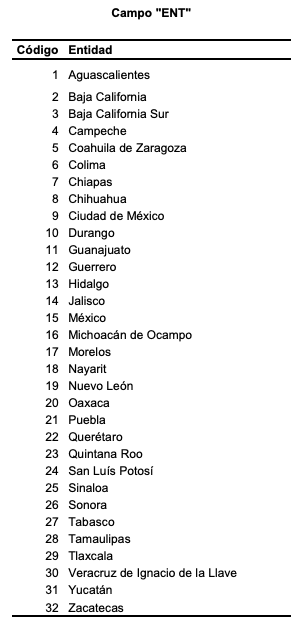

In [ ]:
BDMex2017_2021

,ciudad,sector,salario,Trimestre,OCU
0,9,8121,,2017,648.0
1,9,0,,2017,0.0
2,9,5411,8,2017,648.0
3,9,0,,2017,0.0
4,9,8130,8,2017,648.0
...,...,...,...,...,...
307467,7,6222,,2021,46.0
307468,7,,,2021,0.0
307469,7,8121,3,2021,46.0
307470,7,8121,2,2021,46.0


In [ ]:
BDMex2017_2021['ciudad'].describe()

count     1252669
unique         64
top            11
freq        48925
Name: ciudad, dtype: int64

In [ ]:
BDMex2017_2021.groupby('ciudad').count()

,sector,salario,Trimestre,OCU
ciudad,,,,
1,33665,33665,33665,33665
2,42457,42457,42457,42457
3,23818,23818,23818,23818
4,37331,37331,37331,37331
5,46794,46794,46794,46794
...,...,...,...,...
5,5517,5517,5517,5517
6,2024,2024,2024,2024
7,3328,3328,3328,3328


In [ ]:
BD_Depur_Ocu_Ciudad = BDMex2017_2021.replace(
    {'ciudad': {
        1: "Aguascalientes", 
        2: "BajaCalifornia", 
        3: "SurBajaCalifornia",
        4: "Campeche",
        5: "Coahuila",
        6: "Colima",
        7: "Chiapas",
        8: "Chihuahua",
        9: "CDMX",
        10: "Durango",
        11: "Guanajuato",
        12: "Guerrero",
        13: "Hidalgo",
        14: "Jalisco",
        15: "México",
        16: "Michoacán",
        17: "Morelos",
        18: "Nayarit",
        19: "NuevoLeón",
        20: "Oaxaca",
        21: "Puebla",
        22: "Querétaro",
        23: "QuintanaRoo",
        24: "SanLuisPotosí",
        25: "Sinaloa",
        26: "Sonora",
        27: "Tabasco",
        28: "Tamaulipas",
        29: "Tlaxcala",
        30: "Veracruz",
        31: "Yucatán",
        32: "Zacatecas"}})
BD_Depur_Ocu_Ciudad

,ciudad,sector,salario,Trimestre,OCU
0,CDMX,8121,,2017,648.0
1,CDMX,0,,2017,0.0
2,CDMX,5411,8,2017,648.0
3,CDMX,0,,2017,0.0
4,CDMX,8130,8,2017,648.0
...,...,...,...,...,...
307467,Chiapas,6222,,2021,46.0
307468,Chiapas,,,2021,0.0
307469,Chiapas,8121,3,2021,46.0
307470,Chiapas,8121,2,2021,46.0


In [ ]:
BD_Depur_Ocu_Ciudad['ciudad'].unique()

array(['CDMX', 'México', 'Jalisco', 'NuevoLeón', 'Puebla', 'Guanajuato',
       'Coahuila', 'Durango', 'SanLuisPotosí', 'Yucatán', 'Chihuahua',
       'Tamaulipas', 'Veracruz', 'Guerrero', 'Aguascalientes',
       'Michoacán', 'Tabasco', 'Chiapas', 'BajaCalifornia', 'Sinaloa',
       'Sonora', 'Nayarit', 'Campeche', 'Morelos', 'Oaxaca', 'Zacatecas',
       'Colima', 'Querétaro', 'Tlaxcala', 'SurBajaCalifornia',
       'QuintanaRoo', 'Hidalgo', '9', ' ', '14', '16', '5', '27', '19',
       '20', '21', '23', '24', '25', '26', '28', '29', '30', '1', '2',
       '3', '4', '7', '8', '11', '12', '13', '17', '18', '31', '32', '6',
       '10', '22'], dtype=object)

In [ ]:
 BD_Ciudades_OCU_MX = BD_Depur_Ocu_Ciudad.replace(
    {'ciudad': {
        ' ': "SinDefinir",
        '1': "Aguascalientes", 
        '2': "BajaCalifornia", 
        '3': "SurBajaCalifornia",
        '4': "Campeche",
        '5': "Coahuila",
        '6': "Colima",
        '7': "Chiapas",
        '8': "Chihuahua",
        '9': "CDMX",
        '10': "Durango",
        '11': "Guanajuato",
        '12': "Guerrero",
        '13': "Hidalgo",
        '14': "Jalisco",
        15: "México",
        '16': "Michoacán",
        '17': "Morelos",
        '18': "Nayarit",
        '19': "NuevoLeón",
        '20': "Oaxaca",
        '21': "Puebla",
        '22': "Querétaro",
        '23': "QuintanaRoo",
        '24': "SanLuisPotosí",
        '25': "Sinaloa",
        '26': "Sonora",
        '27': "Tabasco",
        '28': "Tamaulipas",
        '29': "Tlaxcala",
        '30': "Veracruz",
        '31': "Yucatán",
        '32': "Zacatecas"}})
 BD_Ciudades_OCU_MX

,ciudad,sector,salario,Trimestre,OCU
0,CDMX,8121,,2017,648.0
1,CDMX,0,,2017,0.0
2,CDMX,5411,8,2017,648.0
3,CDMX,0,,2017,0.0
4,CDMX,8130,8,2017,648.0
...,...,...,...,...,...
307467,Chiapas,6222,,2021,46.0
307468,Chiapas,,,2021,0.0
307469,Chiapas,8121,3,2021,46.0
307470,Chiapas,8121,2,2021,46.0


In [ ]:
 BD_Ciudades_OCU_MX['ciudad'].unique()

array(['CDMX', 'México', 'Jalisco', 'NuevoLeón', 'Puebla', 'Guanajuato',
       'Coahuila', 'Durango', 'SanLuisPotosí', 'Yucatán', 'Chihuahua',
       'Tamaulipas', 'Veracruz', 'Guerrero', 'Aguascalientes',
       'Michoacán', 'Tabasco', 'Chiapas', 'BajaCalifornia', 'Sinaloa',
       'Sonora', 'Nayarit', 'Campeche', 'Morelos', 'Oaxaca', 'Zacatecas',
       'Colima', 'Querétaro', 'Tlaxcala', 'SurBajaCalifornia',
       'QuintanaRoo', 'Hidalgo', 'SinDefinir'], dtype=object)

In [ ]:
df_limpio_ocu_ciudad_pais_trim1 = BD_Ciudades_OCU_MX.assign(country='México')
df_limpio_ocu_ciudad_pais_trim2 = df_limpio_ocu_ciudad_pais_trim1.assign(quarter=2)
df_limpio_ocu_ciudad_pais_trim3 = df_limpio_ocu_ciudad_pais_trim2.rename(columns={'Trimestre':"year"})
df_limpio_ocu_ciudad_pais_trim4 = df_limpio_ocu_ciudad_pais_trim3.rename(columns={'OCU':"employs"})
df_limpio_ocu_ciudad_pais_trim5 = df_limpio_ocu_ciudad_pais_trim4.rename(columns={'ciudad':"city"})
df_limpio_ocu_ciudad_pais_trim6 = df_limpio_ocu_ciudad_pais_trim5.rename(columns={'salario':"salary"})
df_limpio_ocu_ciudad_pais_trim6

,city,sector,salary,year,employs,country,quarter
0,CDMX,8121,,2017,648.0,México,2
1,CDMX,0,,2017,0.0,México,2
2,CDMX,5411,8,2017,648.0,México,2
3,CDMX,0,,2017,0.0,México,2
4,CDMX,8130,8,2017,648.0,México,2
...,...,...,...,...,...,...,...
307467,Chiapas,6222,,2021,46.0,México,2
307468,Chiapas,,,2021,0.0,México,2
307469,Chiapas,8121,3,2021,46.0,México,2
307470,Chiapas,8121,2,2021,46.0,México,2


In [ ]:
df_pura = df_limpio_ocu_ciudad_pais_trim6[['year', 'quarter','country', 'city', 'employs', 'sector', 'salary']]
df_pura

,year,quarter,country,city,employs,sector,salary
0,2017,2,México,CDMX,648.0,8121,
1,2017,2,México,CDMX,0.0,0,
2,2017,2,México,CDMX,648.0,5411,8
3,2017,2,México,CDMX,0.0,0,
4,2017,2,México,CDMX,648.0,8130,8
...,...,...,...,...,...,...,...
307467,2021,2,México,Chiapas,46.0,6222,
307468,2021,2,México,Chiapas,0.0,,
307469,2021,2,México,Chiapas,46.0,8121,3
307470,2021,2,México,Chiapas,46.0,8121,2


###3.3 Depurando Sectores con diccionario sectores LATAM

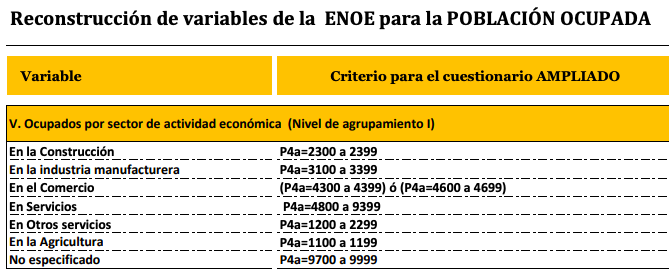

In [ ]:
df_pura_ciiu = df_pura.rename(columns={'sector':"ciiu"})
df_pura_ciiu

,year,quarter,country,city,employs,ciiu,salary
0,2017,2,México,CDMX,648.0,8121,
1,2017,2,México,CDMX,0.0,0,
2,2017,2,México,CDMX,648.0,5411,8
3,2017,2,México,CDMX,0.0,0,
4,2017,2,México,CDMX,648.0,8130,8
...,...,...,...,...,...,...,...
307467,2021,2,México,Chiapas,46.0,6222,
307468,2021,2,México,Chiapas,0.0,,
307469,2021,2,México,Chiapas,46.0,8121,3
307470,2021,2,México,Chiapas,46.0,8121,2


In [ ]:
df_sector = df_pura_ciiu['ciiu']
df_sector.unique()

array([8121.0, '0', 5411.0, 8130.0, 5170.0, 9312.0, 4840.0, 4350.0,
       5614.0, 6112.0, 7221.0, 8112.0, 3260.0, 3110.0, 8122.0, 5613.0,
       4611.0, 4690.0, 3120.0, 2382.0, 3350.0, 4612.0, 4330.0, 3150.0,
       8140.0, 4662.0, 5230.0, 4681.0, 3230.0, 5611.0, 3320.0, 4620.0,
       9313.0, 4641.0, 3250.0, 4661.0, 7131.0, 5322.0, 5221.0, 8111.0,
       2381.0, 7222.0, 6141.0, 2370.0, 4340.0, 3270.0, 6222.0, 6111.0,
       5310.0, 3160.0, 4671.0, 5240.0, 7114.0, 3360.0, 4850.0, 4651.0,
       9999.0, 5616.0, 3210.0, 3380.0, 3340.0, 6131.0, 6132.0, 6211.0,
       5413.0, 4631.0, 4632.0, 3370.0, 9314.0, 4652.0, 5414.0, 4920.0,
       5120.0, 5222.0, 3220.0, 3330.0, 4360.0, 5510.0, 6212.0, 5110.0,
       2363.0, 6221.0, 5615.0, 2361.0, 1110.0, 7120.0, 9700.0, 4881.0,
       4642.0, 3140.0, 5620.0, 1121.0, 4910.0, 4310.0, 6142.0, 6241.0,
       5150.0, 7111.0, 5190.0, 7113.0, 4810.0, 7210.0, 5412.0, 6122.0,
       3130.0, 4682.0, 6251.0, 2221.0, 5210.0, 6231.0, 5321.0, 2210.0,
       22

In [ ]:
#agricultura entre 1100 y 1199 (7) LISTO
#otrosservicios entre 1200 y 2299 (6) LISTO
#construccion entre 2300 y 2399 (5) LISTO
#industria entre 3100 y 3399  (3) LISTO
#comercio entre 4300 y 4399 y 4600 y 4699 (4) LISTO
#servicios entre 4800 y 9399 (1)LISTO
#noespecificado entre 9700 y 9999 (2)LISTO
df_sector_renombrado = df_sector.replace(
    {
     '0':"noespecificado", 8121.0:"servicios",5411.0:"servicios",
     8130.0:"servicios",5170.0:"servicios", 9312.0:"servicios", 
     4840.0:"servicios", 4350.0:"comercio", 5614.0:"servicios", 
     6112.0:"servicios", 7221.0:"servicios",8112.0:"servicios", 
     3260.0:"industria", 3110.0:"industria",8122.0:"servicios", 
     5613.0:"servicios", 4611.0:"comercio", 4690.0:"comercio", 
     3120.0:"industria", 2382.0:"construccion",3350.0:"industria", 
     4612.0:"comercio", 4330.0:"comercio", 3150.0:"industria", 
     8140.0:"servicios", 4662.0:"comercio", 5230.0:"servicios", 
     4681.0:"comercio", 3230.0:"industria", 5611.0:"servicios", 
     3320.0:"industria", 4620.0:"comercio", 9313.0:"servicios",
     4641.0:"comercio", 3250.0:"industria", 4661.0:"comercio", 
     7131.0:"servicios", 5322.0:"servicios", 5221.0:"servicios",
     8111.0:"servicios", 2381.0:"construccion", 7222.0:"servicios", 
     6141.0:"servicios", 2370.0:"construccion", 4340.0:"comercio", 
     3270.0:"industria", 6222.0:"servicios", 6111.0:"servicios", 
     5310.0:"servicios", 3160.0:"industria", 4671.0:"comercio", 
     5240.0:"servicios", 7114.0:"servicios", 
     3360.0:"industria", 4850.0:"servicios",
     4651.0:"comercio", 9999.0:"noespecificado", 5616.0:"servicios", 
     3210.0:"industria", 3380.0:"industria", 3340.0:"industria", 
     6131.0:"servicios", 6132.0:"servicios",6211.0:"servicios", 
     5413.0:"servicios", 4631.0:"comercio", 4632.0:"comercio", 
     3370.0:"industria", 9314.0:"servicios", 4652.0:"comercio", 
     5414.0:"servicios", 4920.0:"servicios", 5120.0:"servicios", 
     5222.0:"servicios", 3220.0:"industria", 3330.0:"industria", 
     4360.0:"comercio", 5510.0:"servicios", 6212.0:"servicios",
     5110.0:"servicios", 2363.0:"construccion", 6221.0:"servicios", 
     5615.0:"servicios", 2361.0:"construccion", 1110.0:"agricultura", 
     7120.0:"servicios", 9700.0:"noespecificado", 4881.0:"servicios", 
     4642.0:"comercio", 3140.0:"industria", 5620.0:"servicios", 
     1121.0:"agricultura", 4910.0:"servicios", 4310.0:"comercio", 
     6142.0:"servicios", 6241.0:"servicios", 5150.0:"servicios", 
     7111.0:"servicios", 
     5190.0:"servicios", 7113.0:"servicios", 4810.0:"servicios", 
     7210.0:"servicios", 5412.0:"servicios", 6122.0:"servicios", 
     3130.0:"industria", 4682.0:"comercio", 
     6251.0:"servicios", 2221.0:"otrosservicios", 
     5210.0:"servicios", 6231.0:"servicios", 5321.0:"servicios",
     2210.0:"otrosservicios", 2222.0:"otrosservicios", 
     5223.0:"servicios", 6150.0:"servicios", 4672.0:"comercio", 
     9311.0:"servicios", 3399.0:"industria", 4320.0:"comercio",
     6252.0:"servicios", 4870.0:"servicios", 8123.0:"servicios",
     3240.0:"industria", 6242.0:"servicios", 7132.0:"servicios", 
     5180.0:"servicios", 3310.0:"industria",
     8125.0:"servicios", 4930.0:"servicios", 7223.0:"servicios", 
     4399.0:"comercio", 4699.0:"comercio", 4820.0:"servicios", 
     2123.0:"otrosservicios", 6232.0:"servicios",
     2399.0:"construccion", 2131.0:"otrosservicios", 1122.0:"agricultura", 
     4830.0:"servicios", 7112.0:"servicios", 2132.0:"otrosservicios", 
     6121.0:"servicios", 4370.0:"comercio",1130.0:"agricultura", 
     9800.0:"noespecificado", 4882.0:"servicios", 7115.0:"servicios", 
     6229.0:"servicios", 8124.0:"servicios", 2122.0:"otrosservicios", 
     1150.0:"agricultura", 5330.0:"servicios", 
     8119.0:"servicios", 1141.0:"agricultura", 
     2110.0:"otrosservicios", 2129.0:"otrosservicios", 5612.0:"servicios", 
     2121.0:"otrosservicios", 7133.0:"servicios", 9320.0:"servicios", 
     6299.0:"servicios", 4860.0:"servicios", 
     9399.0:"servicios", 2199.0:"otrosservicios", 1142.0:"agricultura", 
     6199.0:"servicios", 5299.0:"servicios",
     6149.0:"servicios", 5199.0:"servicios", 6249.0:"servicios", 
     6259.0:"servicios", 6219.0:"servicios", 
     '7221':"servicios", '4330':"comercio", ' ':"noespecificado",
     '9313':"servicios", '3230':"industria", '3220':"industria", 
     '9312':"servicios", '3250':"industria", '5110':"servicios", 
     '4681':"comercio", '4810':"servicios", '5223':"servicios", 
     '2382':"construccion", '6222':"servicios", '4651':"comercio", 
     '5411':"servicios", '4850':"servicios", '8140':"servicios", 
     '5611':"servicios", '3110':"industria", '6112':"servicios", 
     '6132':"servicios", '8121':"servicios", 
     '5615':"servicios", '8130':"servicios", '2363':"construccion", 
     '4611':"comercio", '1110':"agricultura", '7111':"servicios", 
     '5613':"servicios", '4340':"comercio", 
     '5222':"servicios", '9999':"noespecificado", '4631':"comercio", 
     '4699':"comercio", '4840':"servicios", '4690':"comercio", 
     '4612':"comercio", '4620':"comercio", '7120':"servicios", 
     '8123':"servicios", '3350':"industria", '8122':"servicios",
     '6212':"servicios", '5170':"servicios", '6131':"servicios", 
     '4661':"comercio", '6111':"servicios", '3120':"industria", 
     '2381':"construccion", 
     '6141':"servicios", '7112':"servicios", '8112':"servicios", 
     '4920':"servicios", 
     '3150':"industria", '3320':"industria", '6211':"servicios", 
     '5221':"servicios", '2361':"construccion",
     '4632':"comercio", '3340':"industria", '4310':"comercio", 
     '7222':"servicios", '7131':"servicios", 
     '5614':"servicios", '3140':"industria", '5310':"servicios",
     '4671':"comercio", '7132':"servicios", '2221':"otrosservicios", 
     '3260':"industria", '6242':"servicios", '6221':"servicios", 
     '9314':"servicios", '4672':"comercio",
     '2370':"construccion", '7210':"servicios", '3270':"industria", 
     '1121':"agricultura", '5120':"servicios", 
     '5240':"servicios", '3380':"industria", '4641':"comercio",
     '4350':"comercio", '6252':"servicios", '4881':"servicios", 
     '3310':"industria", '8111':"servicios", '5413':"servicios", 
     '6251':"servicios", '5150':"servicios", '3370':"industria", 
     '9700':"noespecificado", '4662':"comercio", '3330':"industria",
     '5190':"servicios", '3360':"industria", '4652':"comercio", 
     '4870':"servicios", '5230':"servicios", '5414':"servicios", 
     '2210':"otrosservicios", '5620':"servicios", '9311':"servicios", 
     '4930':"servicios", '5510':"servicios", '3210':"industria",
     '4830':"servicios", '5322':"servicios", '3130':"industria", 
     '7114':"servicios", '5412':"servicios", '2222':"otrosservicios", 
     '4370':"comercio", '4360':"comercio",
     '5321':"servicios", '2123':"otrosservicios", '4682':"comercio", 
     '3399':"industria", '3160':"industria", 
     '4910':"servicios", '7223':"servicios", '3240':"industria",
     '7113':"servicios", '6142':"servicios", '4320':"comercio", 
     '5180':"servicios", '9320':"servicios", 
     '6150':"servicios", '6231':"servicios", '6121':"servicios",
     '4399':"comercio", '2399':"construccion", '4820':"servicios", 
     '4642':"comercio", '8125':"servicios", 
     '5210':"servicios", '4882':"servicios", '6241':"servicios",
     '1150':"agricultura", '9800':"noespecificado", '1130':"agricultura", 
     '5616':"servicios", '2121':"otrosservicios", 
     '5229':"servicios", '7115':"servicios", '8124':"servicios",
     '6122':"servicios", '2110':"otrosservicios", '6232':"servicios", 
     '2131':"otrosservicios", '2122':"otrosservicios", 
     '2132':"otrosservicios", '5330':"servicios", '2129':"otrosservicios",
     '7133':"servicios", '1141':"agricultura", '6119':"servicios", 
     '5612':"servicios", '4860':"servicios", '1122':"agricultura", 
     '6259':"servicios", '5199':"servicios",'8119':"servicios", 
     '6149':"servicios", '2199':"otrosservicios", '1142':"agricultura",
     '4899':"servicios", '6199':"servicios", '6219':"servicios", 
     '6249':"servicios",'6139':"servicios", 
     '9319':"servicios", '9399':"servicios"})
df_sector_renombrado.unique()


array(['servicios', 'noespecificado', 'comercio', 'industria',
       'construccion', 'agricultura', 'otrosservicios'], dtype=object)

In [ ]:
df_conjunta = pd.concat([df_pura, df_sector_renombrado], axis=1)
df_conjunta

,year,quarter,country,city,employs,sector,salary,ciiu
0,2017,2,México,CDMX,648.0,8121,,servicios
1,2017,2,México,CDMX,0.0,0,,noespecificado
2,2017,2,México,CDMX,648.0,5411,8,servicios
3,2017,2,México,CDMX,0.0,0,,noespecificado
4,2017,2,México,CDMX,648.0,8130,8,servicios
...,...,...,...,...,...,...,...,...
307467,2021,2,México,Chiapas,46.0,6222,,servicios
307468,2021,2,México,Chiapas,0.0,,,noespecificado
307469,2021,2,México,Chiapas,46.0,8121,3,servicios
307470,2021,2,México,Chiapas,46.0,8121,2,servicios


In [ ]:
df_mx_final1 = df_conjunta.rename(columns={'sector':"cod_ciiu"})
df_mx_final2 = df_mx_final1.rename(columns={'ciiu':"activity"})
df_mx_final2

,year,quarter,country,city,employs,cod_ciiu,salary,activity
0,2017,2,México,CDMX,648.0,8121,,servicios
1,2017,2,México,CDMX,0.0,0,,noespecificado
2,2017,2,México,CDMX,648.0,5411,8,servicios
3,2017,2,México,CDMX,0.0,0,,noespecificado
4,2017,2,México,CDMX,648.0,8130,8,servicios
...,...,...,...,...,...,...,...,...
307467,2021,2,México,Chiapas,46.0,6222,,servicios
307468,2021,2,México,Chiapas,0.0,,,noespecificado
307469,2021,2,México,Chiapas,46.0,8121,3,servicios
307470,2021,2,México,Chiapas,46.0,8121,2,servicios


In [ ]:
df_pura_final_mx = df_mx_final2[['year', 'quarter','country', 'city', 'employs', 'cod_ciiu', 'activity', 'salary']]
df_pura_final_mx

,year,quarter,country,city,employs,cod_ciiu,activity,salary
0,2017,2,México,CDMX,648.0,8121,servicios,
1,2017,2,México,CDMX,0.0,0,noespecificado,
2,2017,2,México,CDMX,648.0,5411,servicios,8
3,2017,2,México,CDMX,0.0,0,noespecificado,
4,2017,2,México,CDMX,648.0,8130,servicios,8
...,...,...,...,...,...,...,...,...
307467,2021,2,México,Chiapas,46.0,6222,servicios,
307468,2021,2,México,Chiapas,0.0,,noespecificado,
307469,2021,2,México,Chiapas,46.0,8121,servicios,3
307470,2021,2,México,Chiapas,46.0,8121,servicios,2


Reseteamos el índice para dejarla pulpa

In [ ]:
df_final = df_pura_final_mx.reset_index(drop=True)
df_final

,year,quarter,country,city,employs,cod_ciiu,activity,salary
0,2017,2,México,CDMX,648.0,8121,servicios,
1,2017,2,México,CDMX,0.0,0,noespecificado,
2,2017,2,México,CDMX,648.0,5411,servicios,8
3,2017,2,México,CDMX,0.0,0,noespecificado,
4,2017,2,México,CDMX,648.0,8130,servicios,8
...,...,...,...,...,...,...,...,...
1252664,2021,2,México,Chiapas,46.0,6222,servicios,
1252665,2021,2,México,Chiapas,0.0,,noespecificado,
1252666,2021,2,México,Chiapas,46.0,8121,servicios,3
1252667,2021,2,México,Chiapas,46.0,8121,servicios,2


##4. Guardando la Base Depurada Final

In [ ]:
df_final.to_csv('MexBD2T2017_2021')

Anexo

In [ ]:
for i in df_pura['sector'].inplace (): 
     {df_pura.inplace(df_pura['sector']
        if sector > 2300 and sector < 2399 (df_pura['sector'].inplace="Construcción",
          elif sector > 3100 and sector < 3399 (df_pura['sector'].inplace="Industria",

        if sector > 3100 and sector < 3399 (df_pura['sector'].inplace="Industria",
        if sector > 4300 and sector < 4399 (df_pura['sector'].inplace="Comercio",
        if sector > 4800 and sector < 9399 (df_pura['sector'].inplace="Servicios",
        if sector > 1200 and sector < 2299 (df_pura['sector'].inplace="Servicios",
        if sector > 1100 and sector < 1199 (df_pura['sector'].inplace="Agricultura",
        else (df_pura['sector'].inplace="OtrasActividades"
    }})
)

SyntaxError: ignored